In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime as dt
import datetime

In [3]:
df = pd.read_csv('Base.csv')
df.head()

,year,seq,name,datetime,lat,lon,pressure,winSpeed,Cat
0,1987,5,CALIDERA,1/11/1988 12:00,-11.0,59.6,1000,24.0,TD
1,1987,5,CALIDERA,1/11/1988 18:00,-11.0,58.9,1000,20.0,TD
2,1987,5,CALIDERA,1/12/1988 0:00,-11.2,58.2,1000,20.0,TD
3,1987,5,CALIDERA,1/12/1988 6:00,-11.3,57.7,997,25.0,TD
4,1987,5,CALIDERA,1/12/1988 12:00,-11.8,56.7,997,25.0,TD


In [4]:
# Extact date, day, month, year, hour, from datetime

df['Date'] = pd.DatetimeIndex(df['datetime']).date
df['Day'] = pd.DatetimeIndex(df['datetime']).day
df['Month'] = pd.DatetimeIndex(df['datetime']).month
df['Year'] = pd.DatetimeIndex(df['datetime']).year
df['Hour'] = pd.DatetimeIndex(df['datetime']).hour
df.head()

,year,seq,name,datetime,lat,lon,pressure,winSpeed,Cat,Date,Day,Month,Year,Hour
0,1987,5,CALIDERA,1/11/1988 12:00,-11.0,59.6,1000,24.0,TD,1988-01-11,11,1,1988,12
1,1987,5,CALIDERA,1/11/1988 18:00,-11.0,58.9,1000,20.0,TD,1988-01-11,11,1,1988,18
2,1987,5,CALIDERA,1/12/1988 0:00,-11.2,58.2,1000,20.0,TD,1988-01-12,12,1,1988,0
3,1987,5,CALIDERA,1/12/1988 6:00,-11.3,57.7,997,25.0,TD,1988-01-12,12,1,1988,6
4,1987,5,CALIDERA,1/12/1988 12:00,-11.8,56.7,997,25.0,TD,1988-01-12,12,1,1988,12


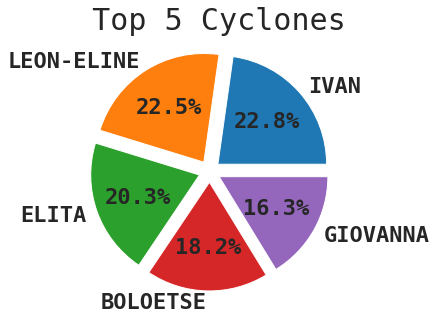

In [8]:
lst = [x.strip() for x in df.groupby('name').count().sort_values(by = 'Date' , ascending = False).index[:5]]
val = df.groupby('name').count().sort_values(by = 'Date' , ascending = False)[:5]['Date'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(6,5)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(5)])
plt.title(' Top 5 Cyclones' , fontsize = 30)
plt.show()

Text(0.5, 1.0, 'Fréquence mensuelle des cyclones')

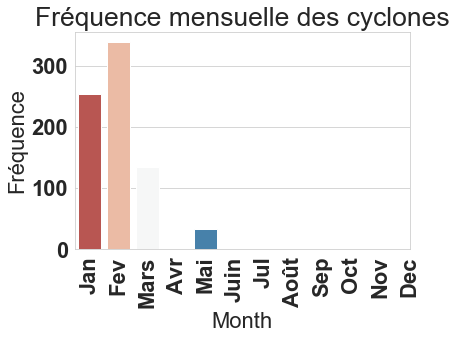

In [11]:
## Frequency of Hurricanes by Month.
mnt = ['Jan' , 'Fev' , 'Mars' , 'Avr' , 'Mai' , 'Juin' , 'Jul' , 'Août' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = df.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (6,4))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'Date' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Fréquence')
plt.title('Fréquence mensuelle des cyclones')

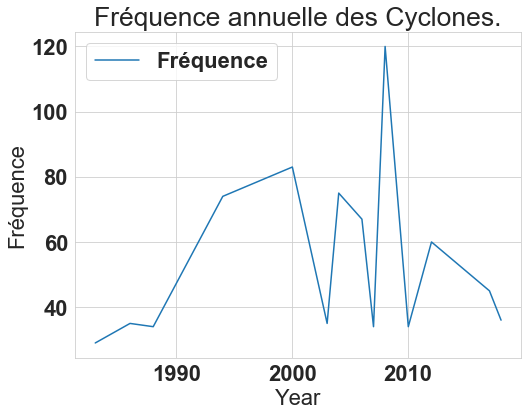

In [10]:
# Year-Wise Frequency of Hurricanes.
temp = df.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (8,6))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Fréquence')
plt.ylabel('Fréquence')
plt.title('Fréquence annuelle des Cyclones.')
plt.show()

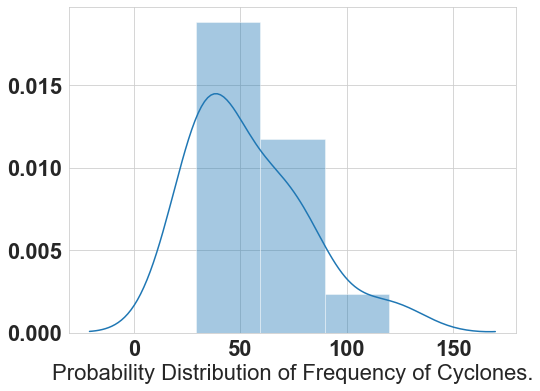

In [7]:
# Probability Distribution Function of Frequency.
temp = df.groupby('Year').count().sort_values(by = 'Date' , ascending = False)
plt.figure(figsize=(8,6))
sns.distplot(temp['Date'].values , norm_hist = True , axlabel = 'Probability Distribution of Frequency of Cyclones.')

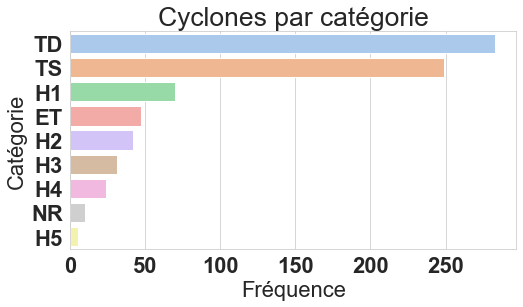

In [13]:
## Frequency of Cyclones by Category
# TD – Tropical cyclone of tropical depression intensity (< 34 knots)
# TS – Tropical cyclone of tropical storm intensity (34-63 knots)
# H1 – Hurricane 1 (wind Speed between 64-82 knots)
# H2 – Hurricane 2 (wind Speed between 83-95 knots)
# H3 – Hurricane 3 (wind Speed between 96-112 knots)
# H4 – Hurricane 4 (wind Speed between 113-135 knots)
# H5 – Hurricane 5 (wind Speed >135 knots)

temp = df.groupby('Cat').count().sort_values(by = 'Date' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(8,4)
sns.barplot(y = list(temp.index) , x = 'Date' , data = temp, palette= 'pastel' )
plt.xlabel('Fréquence')
plt.ylabel('Catégorie')
plt.title('Cyclones par catégorie')
plt.show()


In [14]:
# delete columns
del df['year']
del df['seq']
del df['Year']
del df['datetime']
del df['Cat']
del df['Date']

In [15]:
df = df[df['pressure'] != 0]
df.head()

,name,lat,lon,pressure,winSpeed,Day,Month,Hour
0,CALIDERA,-11.0,59.6,1000,24.0,11,1,12
1,CALIDERA,-11.0,58.9,1000,20.0,11,1,18
2,CALIDERA,-11.2,58.2,1000,20.0,12,1,0
3,CALIDERA,-11.3,57.7,997,25.0,12,1,6
4,CALIDERA,-11.8,56.7,997,25.0,12,1,12


In [16]:
df1 =  df[[ 'lat', 'lon', 'pressure', 'winSpeed' ]]

In [17]:
df1.describe()

,lat,lon,pressure,winSpeed
count,761.000000,761.000000,761.000000,761.000000
mean,-18.931800,54.224967,1199.466491,46.681997
std,5.688475,13.359999,1370.671195,27.719009
min,-41.600000,33.800000,905.000000,-1.000000
25%,-22.500000,45.000000,980.000000,25.000000
50%,-17.800000,51.600000,993.000000,35.000000
75%,-14.300000,58.200000,1000.000000,60.000000
max,-9.400000,115.500000,9999.000000,145.000000


In [18]:
# Total amount of hurricanes we have in our dataset 
print(len(pd.unique(df['name'])))

17


In [19]:
# Since our keys are strings, we enumerate them to access them as integers 
keys = list(enumerate(pd.unique(df['name'])))

y = np.zeros((17))
for x in range(0,17):
    y[x] = len(pd.DataFrame(df[df['name'] == keys[x][1]], columns = df.keys()).reset_index(drop = True))

# Now contains how many time instances of data (or rows) each hurricane contains 
hurricane_amount = pd.DataFrame(y)

In [20]:
# Now we can see that we have at least 8 rows of information per cyclone and at most 84.
hurricane_amount.describe()

,0
count,17.000000
mean,44.764706
std,21.361558
min,8.000000
25%,34.000000
50%,36.000000
75%,60.000000
max,84.000000


In [21]:
keys = list(enumerate(pd.unique(df['name'])))

total_hurricane_count = len(pd.unique(df['name']))
print(total_hurricane_count)

y = np.zeros((total_hurricane_count))
for x in range(0,total_hurricane_count):
    y[x] = len(pd.DataFrame(df[df['name'] == keys[x][1]], columns = df.keys()).reset_index(drop = True))
    
# Now contains how many time instances of data (or rows) each hurricane contains 
hurricane_amount = pd.DataFrame(y)

17


Top 5 Hurricanes (in terms of data quantity)
IVAN - 84.0
LEON-ELINE - 83.0
ELITA - 75.0
BOLOETSE - 67.0
GIOVANNA - 60.0


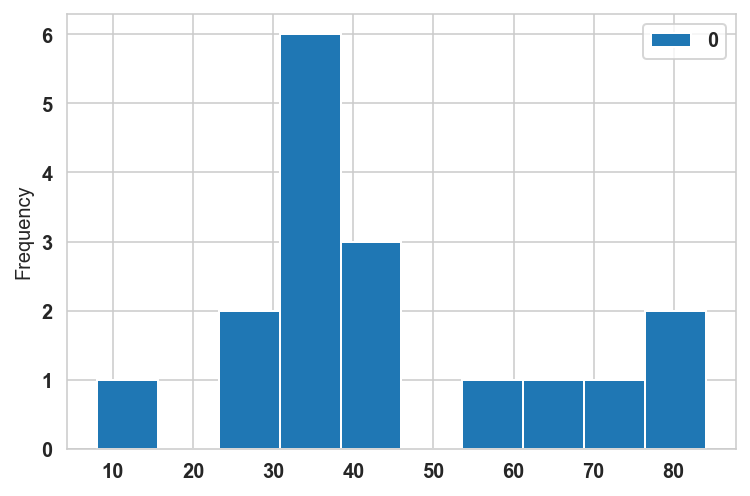

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Print the hurricane key with the amount of data they contain
print ('Top 5 Hurricanes (in terms of data quantity)')
for x in hurricane_amount.nlargest(5, 0).index:
    print (keys[x][1], "-", hurricane_amount.loc[x][0])

# Print the distribution of data quantity for all 17 hurricanes
hurricane_amount.plot.hist(bins=10)
plt.show()

In [23]:
df.describe()

,lat,lon,pressure,winSpeed,Day,Month,Hour
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,-18.931800,54.224967,1199.466491,46.681997,14.035480,2.290407,9.172142
std,5.688475,13.359999,1370.671195,27.719009,8.642767,2.213838,6.763918
min,-41.600000,33.800000,905.000000,-1.000000,1.000000,1.000000,0.000000
25%,-22.500000,45.000000,980.000000,25.000000,7.000000,1.000000,6.000000
50%,-17.800000,51.600000,993.000000,35.000000,12.000000,2.000000,10.000000
75%,-14.300000,58.200000,1000.000000,60.000000,21.000000,2.000000,18.000000
max,-9.400000,115.500000,9999.000000,145.000000,31.000000,12.000000,22.000000


In [24]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from geopy.distance import great_circle as vc
import math as Math

#from mpl_toolkits.basemap import Basemap
# import matplotlib.cm as cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import math, time

from keras.models import model_from_json

Using TensorFlow backend.


In [25]:
# Total amount of data tuples
total_data_count = len(df)
print(total_data_count)

761


In [26]:
y = np.zeros(total_hurricane_count)
df['distance'] = np.zeros(total_data_count)
df['direction'] = np.zeros(total_data_count)
d= []
c = []
# For all hurricanes
for x in range(0, total_hurricane_count):
    t = pd.DataFrame(df[df['name'] == keys[x][1]], columns = df.keys()).reset_index(drop = False)
    dst = 0
    prev = (0,0)
    
    # For all latitude and longitude points of hurricane, calculate the angle of travel and distance
    for p in zip(t['lat'], t['lon']):
        
        if prev == (0,0):
            prev = p
            continue 
        # Stores the distance into the DataFrame
        l = (t[(t['lat'] == p[0]) & (t['lon'] == p[1])]['index'].values[0], 'distance', vc(prev,p).miles)
        d.append(l)
        dLon = p[1] - prev[1];  
        temp = float(p[0]) # p[0] is a str?
        y_x = Math.sin(dLon) * Math.cos(temp);
        
        x_x = Math.cos(p[1]) * Math.sin(temp) - Math.sin(p[1]) * Math.cos(temp) * Math.cos(dLon);
        brng = Math.degrees(Math.atan2(y_x, x_x)) 
        if (brng < 0):
            brng+= 360;
        
        # Stores the angle of travel into the DataFrame
        b=(t[(t['lat'] == p[0]) & (t['lon'] == p[1])]['index'].values[0], 'direction', brng)
        c.append(b)
        dst += vc(prev,p).miles
        prev = p
    y[x] = dst

# Now contains the distance between all given latitude and longitude points
hurricane_distance = pd.DataFrame(y)

In [27]:
print(hurricane_distance.shape)

(17, 1)


In [28]:
hurricane_distance.describe()

,0
count,17.000000
mean,2781.020928
std,1273.983941
min,416.825163
25%,1827.914463
50%,2555.901748
75%,3679.896504
max,5724.323120


In [29]:
data=df.iloc[0:380,:]
ds=pd.DataFrame(d)
dr= pd.DataFrame(c)

In [30]:
data['Distance'] = ds[2]
data['Direction'] = dr[2]

C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
del data['distance']
del data['direction']

In [32]:
data.head()

,name,lat,lon,pressure,winSpeed,Day,Month,Hour,Distance,Direction
0,CALIDERA,-11.0,59.6,1000,24.0,11,1,12,47.476776,180.231363
1,CALIDERA,-11.0,58.9,1000,20.0,11,1,18,49.431384,209.248548
2,CALIDERA,-11.2,58.2,1000,20.0,12,1,0,34.580192,315.900988
3,CALIDERA,-11.3,57.7,997,25.0,12,1,6,75.999715,315.961428
4,CALIDERA,-11.8,56.7,997,25.0,12,1,12,70.702642,311.259139


Top 5 Cyclones (in terms of distance traveled)
LEON-ELINE : 5724.323119862567 miles ; 83.0
ELITA : 4064.0090832538144 miles ; 75.0
BOLOETSE : 3963.0650090112795 miles ; 67.0
GIOVANNA : 3767.9971813855777 miles ; 60.0
IVAN : 3679.896503593131 miles ; 84.0


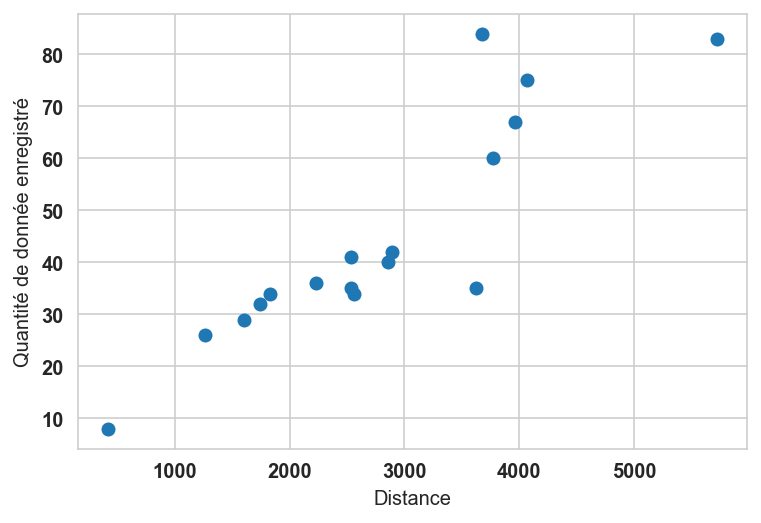

In [34]:
# Print the Cyclone key with the amount of data they contain
print ('Top 5 Cyclones (in terms of distance traveled)')
for x in hurricane_distance.nlargest(5, 0).index:
    print (keys[x][1], ":", hurricane_distance.loc[x][0], "miles ;", hurricane_amount.loc[x][0])

# Plotted the amount of hurricane distance traveled vs the amount of data they contain.
corr = plt.scatter(hurricane_distance[0], hurricane_amount[0])
plt.xlabel('Distance')
plt.ylabel('Quantité de donnée enregistré')
plt.show()

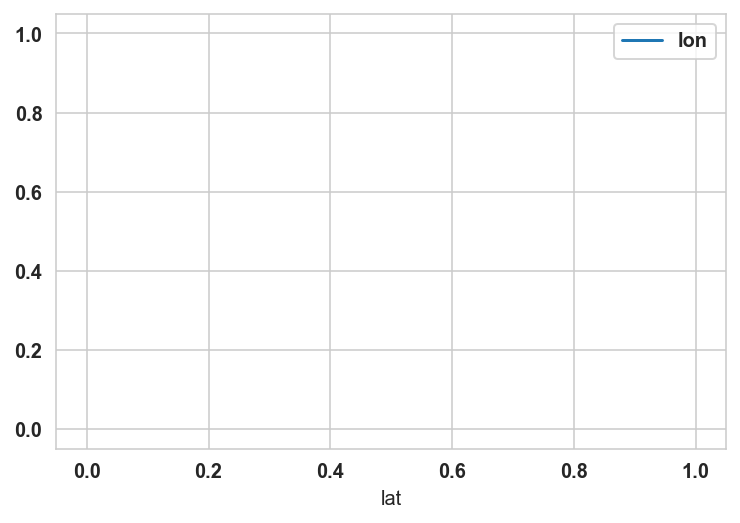

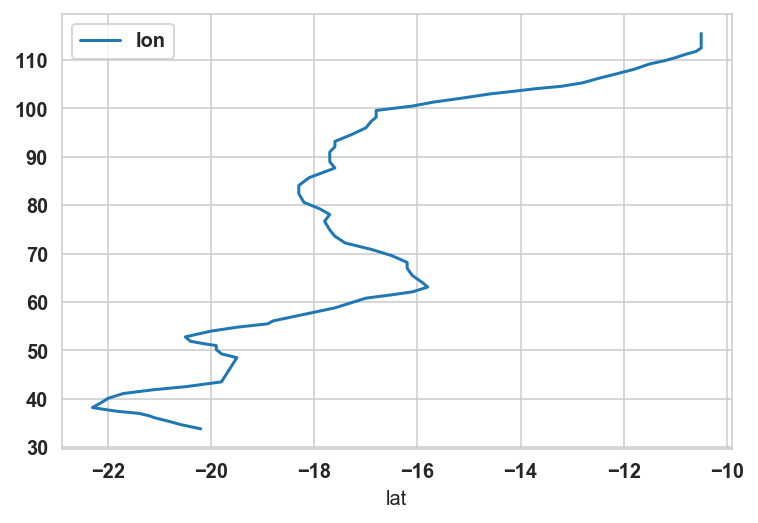

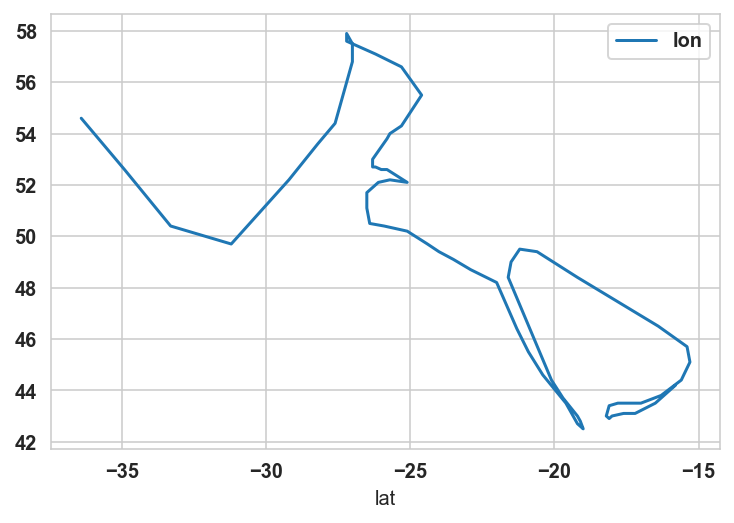

In [35]:
# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
for x in hurricane_amount.nlargest(3, 0).index:
    data[data['name'] == keys[x][1]].plot(x='lat', y='lon') 

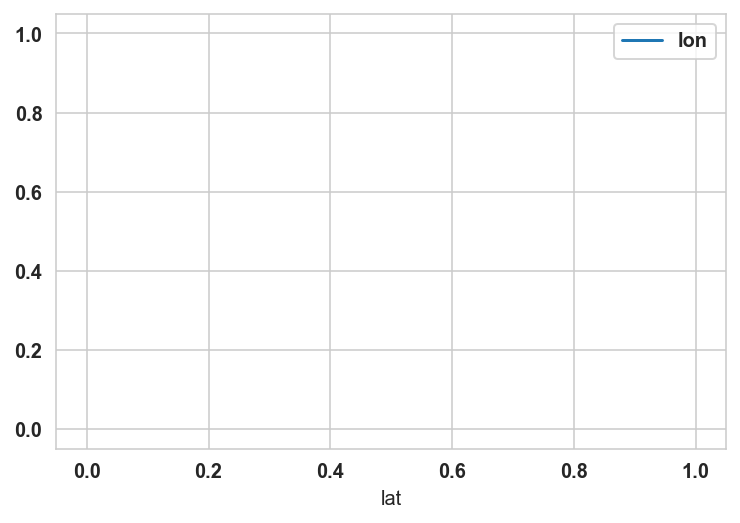

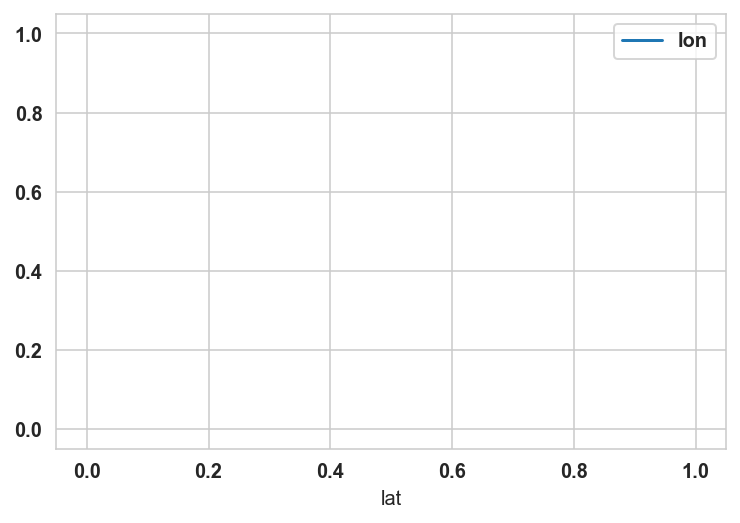

In [36]:
# Graph the trajectories of 2 random hurricanes 
for x in np.random.choice(17,2):
     data[data['name'] == keys[x][1]].plot(x='lat', y='lon')

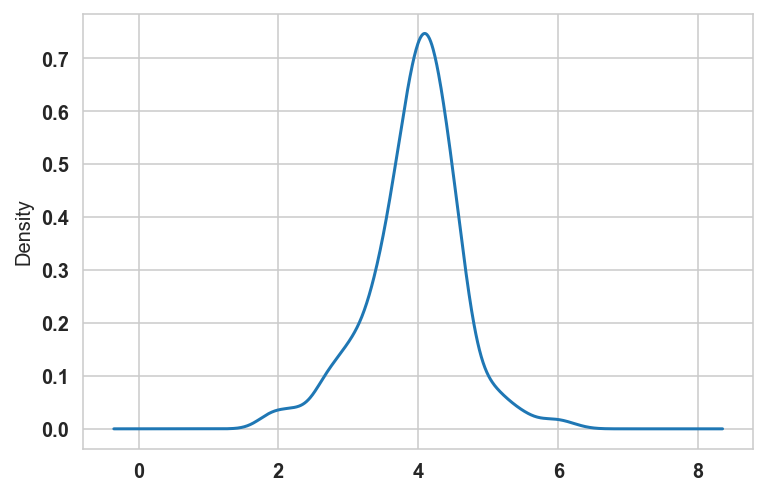

In [37]:
# Distribution of distance traveled in a 6 hour time interval for all hurricanes
dist = data[data['Distance'] > 0]
dist = np.log(dist['Distance'])
ser = pd.Series(dist)
ser.plot.kde()

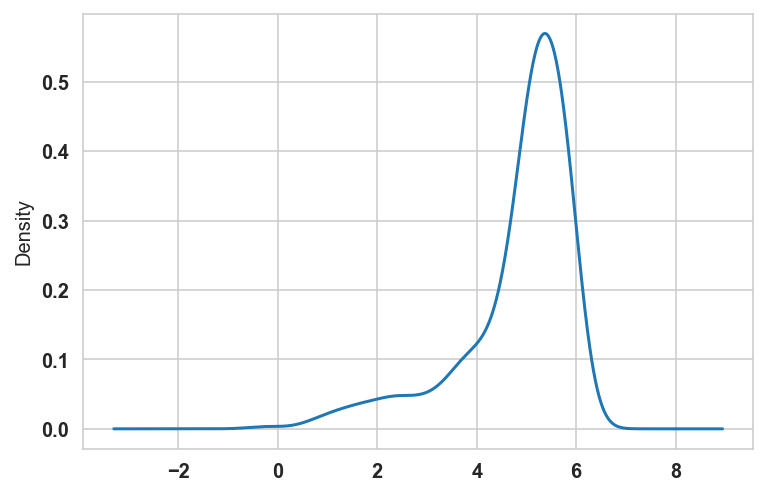

In [38]:
# Distribution of angle traveled in a 6 hour time interval for all hurricanes
direc = data[data['Direction'] > 0]
direc = np.log(direc['Direction'])
ser = pd.Series(direc)
ser.plot.kde()

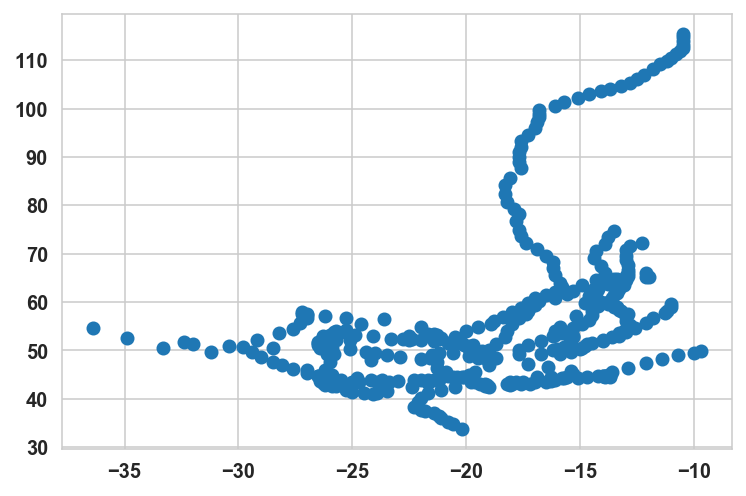

In [39]:
corr = plt.scatter(data['lat'], data['lon'])
plt.show()

In [40]:
len(data)

380

In [41]:
# Assigning each point to a specific location in the grid. 
# For example, we will learn how a tropical cyclone in quadrant 2 with move.
data['gridID'] = np.zeros(380)

C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
# These variable are hyperparameters
lat_min = -41.60
long_min = 33.80
lat_max = -9.50
long_max = 115.50
lat_interval = round(-9.40 + 41)
long_interval = round(115.50 -33.80)


data['gridID'] = (data['lat'] + 41.6000) / lat_interval + ( (data['lon'] -33.8000) * 6) / long_interval
data['gridID'] = round(data['gridID'])
    
data.head()

C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,name,lat,lon,pressure,winSpeed,Day,Month,Hour,Distance,Direction,gridID
0,CALIDERA,-11.0,59.6,1000,24.0,11,1,12,47.476776,180.231363,3.0
1,CALIDERA,-11.0,58.9,1000,20.0,11,1,18,49.431384,209.248548,3.0
2,CALIDERA,-11.2,58.2,1000,20.0,12,1,0,34.580192,315.900988,3.0
3,CALIDERA,-11.3,57.7,997,25.0,12,1,6,75.999715,315.961428,3.0
4,CALIDERA,-11.8,56.7,997,25.0,12,1,12,70.702642,311.259139,3.0


In [43]:
data.to_csv('check.csv') # Save the dataframe to csv for checkpoint

# Build the Model

In [44]:
data = pd.read_csv('check.csv', index_col=0) 

In [45]:
data.head() # Check loaded data

,name,lat,lon,pressure,winSpeed,Day,Month,Hour,Distance,Direction,gridID
0,CALIDERA,-11.0,59.6,1000,24.0,11,1,12,47.476776,180.231363,3.0
1,CALIDERA,-11.0,58.9,1000,20.0,11,1,18,49.431384,209.248548,3.0
2,CALIDERA,-11.2,58.2,1000,20.0,12,1,0,34.580192,315.900988,3.0
3,CALIDERA,-11.3,57.7,997,25.0,12,1,6,75.999715,315.961428,3.0
4,CALIDERA,-11.8,56.7,997,25.0,12,1,12,70.702642,311.259139,3.0


In [46]:
del data['Month']
del data['Day']
del data['Hour']
del data['lat']
del data['lon']
del data['name']
temp_df = data

temp_df = temp_df[temp_df['Distance'] > 0]
temp_df['Distance'] = np.log(temp_df['Distance'])

temp_df = temp_df[temp_df['Direction'] > 0]
temp_df['Direction'] = np.log(temp_df['Direction'])

temp_df.head()

,pressure,winSpeed,Distance,Direction,gridID
0,1000,24.0,3.860241,5.194241,3.0
1,1000,20.0,3.900586,5.343523,3.0
2,1000,20.0,3.543281,5.755429,3.0
3,997,25.0,4.330730,5.755620,3.0
4,997,25.0,4.258483,5.740626,3.0


In [47]:
max(temp_df['gridID']) # Total grid spots

7.0

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the values to predict them more easily in our model
scaler = MinMaxScaler(feature_range=(0, 1))
temp_df = pd.DataFrame(scaler.fit_transform(temp_df), columns=['winSpeed', 'pressure', 'Distance', 'Direction', 'gridID'])
temp_df.head()

,winSpeed,pressure,Distance,Direction,gridID
0,0.010446,0.171233,0.468324,0.887445,0.333333
1,0.010446,0.143836,0.477593,0.911831,0.333333
2,0.010446,0.143836,0.395501,0.979120,0.333333
3,0.010117,0.178082,0.576420,0.979151,0.333333
4,0.010117,0.178082,0.559821,0.976701,0.333333


In [49]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values 
    sequence_length = seq_len + 1 # Because index starts at 0
    result = []
    
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    result = np.array(result)
    row = len(result) * 0.85 # Amount of data to train on    
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [50]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import math, time

def build_model(layers):
    model = Sequential()

    for x in range(0,5):
        model.add(LSTM(input_dim=layers[0], output_dim=layers[1], return_sequences=True))
        model.add(Dropout(0.2))

    model.add(LSTM(layers[2], return_sequences=False)) 
    model.add(Dropout(0.2))

    model.add(Dense(output_dim=layers[2]))
    model.add(Activation("sigmoid"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

# Train the Model

In [51]:
window = 8 # Another hyperparameter
X_train, y_train, X_test, y_test = load_data(temp_df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (303, 8, 5)
y_train (303,)
X_test (54, 8, 5)
y_test (54,)


In [52]:
model = build_model([5, window, 1])

C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 5), units=8)`
  # Remove the CWD from sys.path while we load stuff.


Compilation Time :  0.06399703025817871


C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [53]:
history=model.fit(X_train, y_train, batch_size=50, epochs=200, validation_split=0.1, verbose=1)

Train on 272 samples, validate on 31 samples
Epoch 1/200
272/272 [==============================] - 8s 28ms/step - loss: 0.1115 - accuracy: 0.1691 - val_loss: 0.1997 - val_accuracy: 0.3548
Epoch 2/200
272/272 [==============================] - 0s 637us/step - loss: 0.1042 - accuracy: 0.1949 - val_loss: 0.1991 - val_accuracy: 0.3548
Epoch 3/200
272/272 [==============================] - 0s 588us/step - loss: 0.0959 - accuracy: 0.1949 - val_loss: 0.1992 - val_accuracy: 0.3548
Epoch 4/200
272/272 [==============================] - 0s 588us/step - loss: 0.0857 - accuracy: 0.1949 - val_loss: 0.2008 - val_accuracy: 0.3548
Epoch 5/200
272/272 [==============================] - 0s 647us/step - loss: 0.0759 - accuracy: 0.1949 - val_loss: 0.2041 - val_accuracy: 0.3548
Epoch 6/200
272/272 [==============================] - 0s 618us/step - loss: 0.0685 - accuracy: 0.1949 - val_loss: 0.2100 - val_accuracy: 0.3548
Epoch 7/200
272/272 [==============================] - 0s 588us/step - loss: 0.0617 - 

Epoch 57/200
272/272 [==============================] - 0s 706us/step - loss: 0.0301 - accuracy: 0.1949 - val_loss: 0.1504 - val_accuracy: 0.3548
Epoch 58/200
272/272 [==============================] - 0s 655us/step - loss: 0.0290 - accuracy: 0.1949 - val_loss: 0.1497 - val_accuracy: 0.3548
Epoch 59/200
272/272 [==============================] - 0s 676us/step - loss: 0.0277 - accuracy: 0.1949 - val_loss: 0.1491 - val_accuracy: 0.3548
Epoch 60/200
272/272 [==============================] - 0s 588us/step - loss: 0.0297 - accuracy: 0.1949 - val_loss: 0.1492 - val_accuracy: 0.2903
Epoch 61/200
272/272 [==============================] - 0s 618us/step - loss: 0.0288 - accuracy: 0.1949 - val_loss: 0.1480 - val_accuracy: 0.3548
Epoch 62/200
272/272 [==============================] - 0s 676us/step - loss: 0.0304 - accuracy: 0.1949 - val_loss: 0.1471 - val_accuracy: 0.4194
Epoch 63/200
272/272 [==============================] - 0s 676us/step - loss: 0.0316 - accuracy: 0.1949 - val_loss: 0.1474 -

Epoch 113/200
272/272 [==============================] - 0s 720us/step - loss: 0.0219 - accuracy: 0.1949 - val_loss: 0.1339 - val_accuracy: 0.4839
Epoch 114/200
272/272 [==============================] - 0s 615us/step - loss: 0.0214 - accuracy: 0.1949 - val_loss: 0.1330 - val_accuracy: 0.4839
Epoch 115/200
272/272 [==============================] - 0s 647us/step - loss: 0.0236 - accuracy: 0.1949 - val_loss: 0.1336 - val_accuracy: 0.4839
Epoch 116/200
272/272 [==============================] - 0s 618us/step - loss: 0.0201 - accuracy: 0.1949 - val_loss: 0.1335 - val_accuracy: 0.4839
Epoch 117/200
272/272 [==============================] - 0s 706us/step - loss: 0.0210 - accuracy: 0.1949 - val_loss: 0.1334 - val_accuracy: 0.4839
Epoch 118/200
272/272 [==============================] - 0s 730us/step - loss: 0.0187 - accuracy: 0.1949 - val_loss: 0.1329 - val_accuracy: 0.4839
Epoch 119/200
272/272 [==============================] - 0s 643us/step - loss: 0.0188 - accuracy: 0.1949 - val_loss: 0

272/272 [==============================] - 0s 676us/step - loss: 0.0165 - accuracy: 0.1949 - val_loss: 0.1291 - val_accuracy: 0.4839
Epoch 169/200
272/272 [==============================] - 0s 706us/step - loss: 0.0174 - accuracy: 0.1949 - val_loss: 0.1281 - val_accuracy: 0.4839
Epoch 170/200
272/272 [==============================] - 0s 706us/step - loss: 0.0164 - accuracy: 0.1949 - val_loss: 0.1292 - val_accuracy: 0.4839
Epoch 171/200
272/272 [==============================] - 0s 647us/step - loss: 0.0202 - accuracy: 0.1949 - val_loss: 0.1298 - val_accuracy: 0.4839
Epoch 172/200
272/272 [==============================] - 0s 706us/step - loss: 0.0218 - accuracy: 0.1949 - val_loss: 0.1283 - val_accuracy: 0.4839
Epoch 173/200
272/272 [==============================] - 0s 706us/step - loss: 0.0150 - accuracy: 0.1949 - val_loss: 0.1285 - val_accuracy: 0.4839
Epoch 174/200
272/272 [==============================] - 0s 678us/step - loss: 0.0193 - accuracy: 0.1949 - val_loss: 0.1287 - val_ac

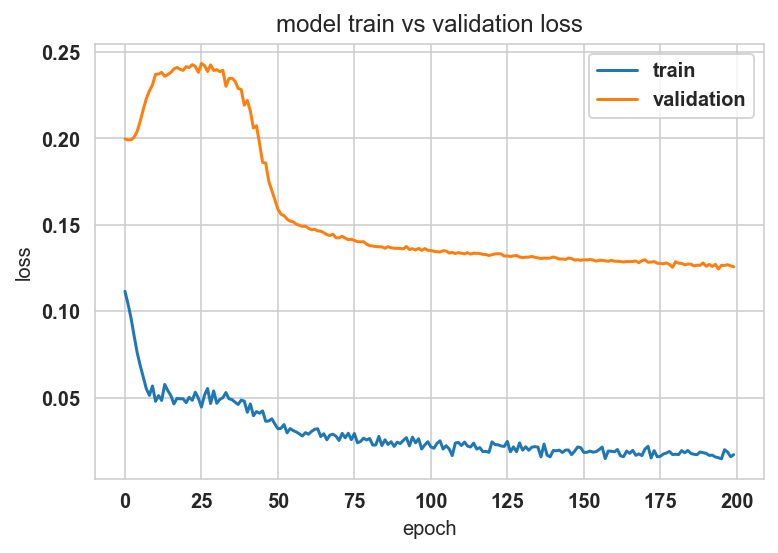

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [55]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.02 MSE (0.15 RMSE)
Test Score: 0.02 MSE (0.14 RMSE)


# Predicting Tropical Cyclone Trajectory

In [56]:
pred = model.predict(X_train)

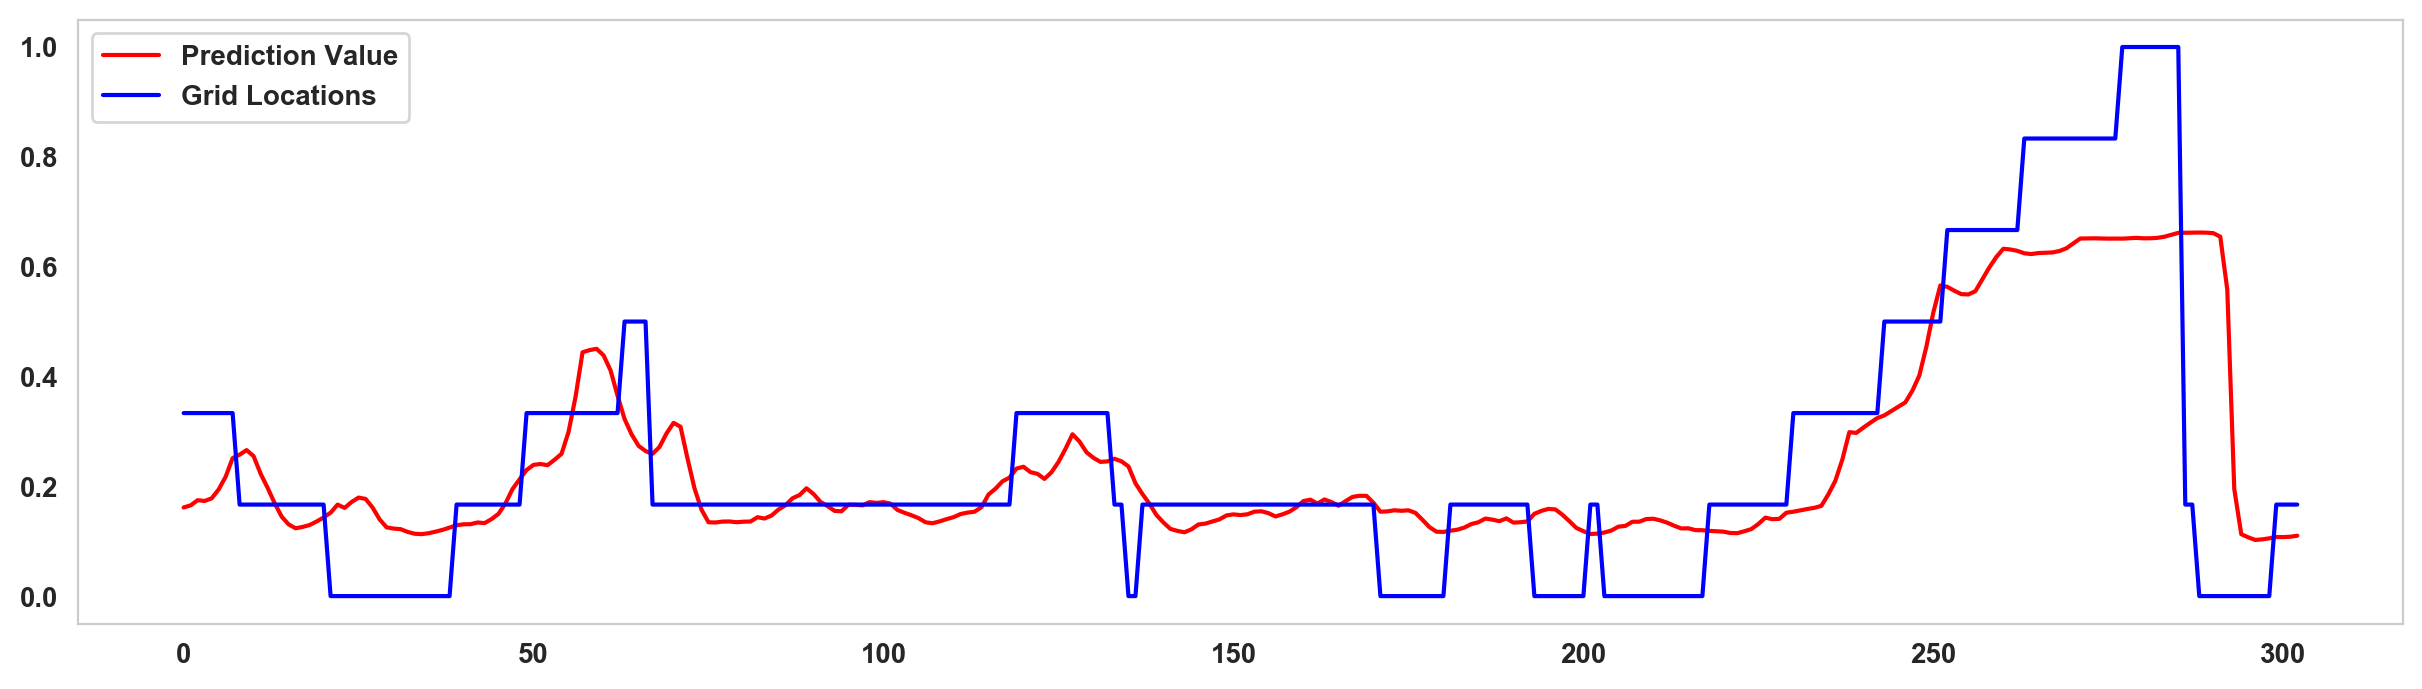

In [57]:
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred, color='red', label='Prediction Value')
plt.plot(y_train, color='blue', label='Grid Locations')
plt.legend(loc='upper left')
plt.grid()
plt.show()

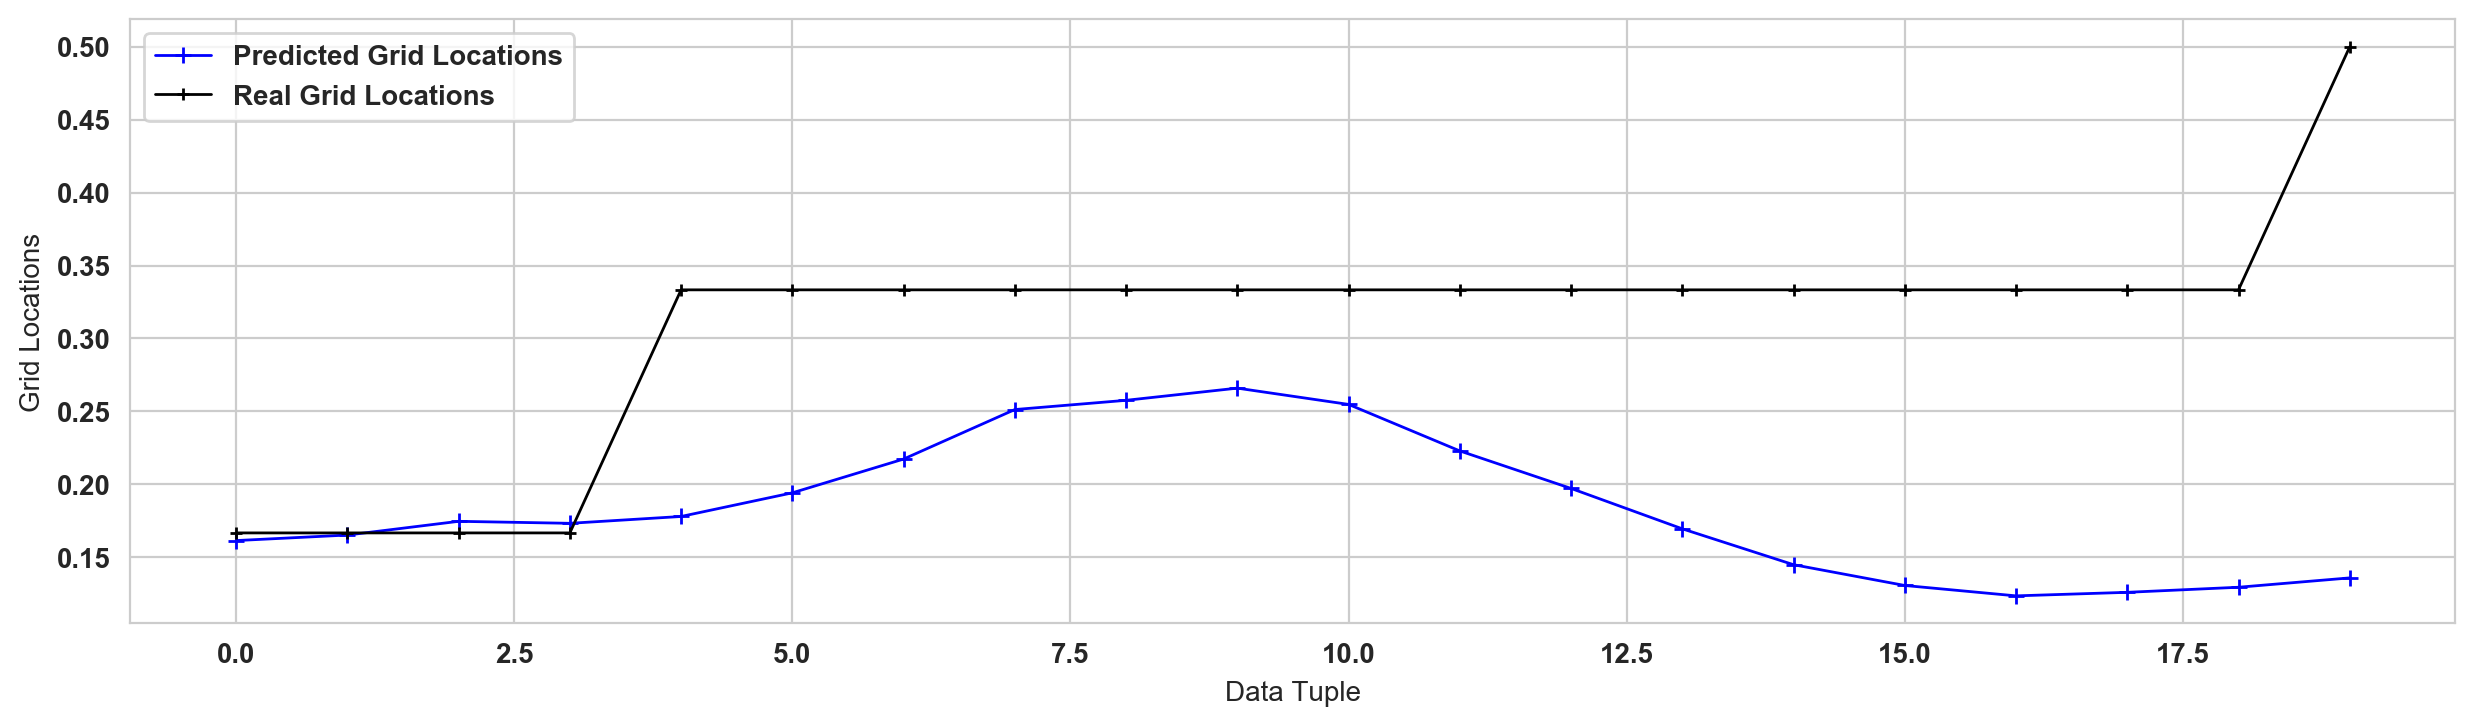

In [58]:
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:20],
         linewidth=1, 
         color='blue', 
         marker='+',
         label='Predicted Grid Locations')
plt.plot(y_test[:20],
         linewidth=1, 
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')

plt.legend(loc='upper left')
# plt.savefig('grid_accuracy.png')
plt.show()

In [59]:
model.summary()
model.get_config()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 8)           448       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 8)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 8)           544       
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 8)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 8)           544       
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 8)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 8)          

{'name': 'sequential_1',
 'layers': [{'class_name': 'LSTM',
   'config': {'name': 'lstm_1',
    'trainable': True,
    'batch_input_shape': (None, None, 5),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'units': 8,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': Non

In [60]:
data1 = pd.read_csv('check.csv', index_col=0) 

In [61]:
del data1['Month']
del data1['Day']
del data1['Hour']
del data1['lat']
del data1['lon']

In [62]:
print(len(pd.unique(data1['name'])))

8


In [63]:
data1.head()

,name,pressure,winSpeed,Distance,Direction,gridID
0,CALIDERA,1000,24.0,47.476776,180.231363,3.0
1,CALIDERA,1000,20.0,49.431384,209.248548,3.0
2,CALIDERA,1000,20.0,34.580192,315.900988,3.0
3,CALIDERA,997,25.0,75.999715,315.961428,3.0
4,CALIDERA,997,25.0,70.702642,311.259139,3.0


In [64]:
names = data1['name'].unique()
# Normalize the values to predict them more easily in our model
scalers = {}
gridScalers = {}
for name in names:
    scalers[name] = MinMaxScaler(feature_range=(0, 1))
#     gridScalers[name] = MinMaxScaler(feature_range=(0, 1))
#     gridScalers[name].fit_transform((data[data['unique-key'] == name])['gridID'].reshape(-1,1))
    hurricane = data1[data1['name'] == name]
    hurricane.drop('name', axis = 1, inplace= True)
    
    hurricane = pd.DataFrame(scalers[name].fit_transform(hurricane), columns=['winSpeed',
                                                                              'pressure',
                                                                              'Distance',
                                                                              'Direction', 
                                                                              'gridID'])
    data1.loc[data1['name'] == name, ['winSpeed', 'pressure', 'Distance', 'Direction', 'gridID']] = hurricane.values

C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarni

In [65]:
data_pad = []
for key in np.unique(data1['name']):
    data_pad += [data1[ data1.loc[:, 'name'] == key].loc[:, ['winSpeed', 'pressure', 'Distance', 'Direction', 'gridID']]]

In [66]:
data_pad[1]

,winSpeed,pressure,Distance,Direction,gridID
0,0.918919,0.088889,0.362559,0.539682,1.0
1,0.918919,0.000000,0.383613,0.626571,1.0
2,0.918919,0.000000,0.223639,0.945930,1.0
3,0.837838,0.111111,0.669803,0.946111,1.0
4,0.837838,0.111111,0.612743,0.932030,1.0
5,0.837838,0.111111,0.667886,0.904743,1.0
6,0.837838,0.222222,0.568979,0.929341,0.5
7,0.675676,0.333333,0.540574,0.903783,0.5
8,0.486486,0.333333,0.684879,0.916051,0.5
9,0.270270,0.444444,0.576523,0.309345,0.5


In [67]:
len(data1)
len(data_pad)
len_vals = []
for x in range(len(data_pad)):
    len_vals += [len(data_pad[x])]
print(max(len_vals))

83


In [68]:
import keras

In [69]:
padded_data = keras.preprocessing.sequence.pad_sequences(data_pad, maxlen=83, dtype='float', padding='post', truncating='pre', value=0.0)

In [70]:
padded_data[0]

array([[1.        , 0.        , 1.        , 0.45047743, 1.        ],
       [1.        , 0.        , 0.90565747, 0.12368459, 1.        ],
       [1.        , 0.25      , 0.17968048, 0.40602919, 1.        ],
       [1.        , 0.25      , 0.157765  , 0.30486733, 1.        ],
       [1.        , 0.25      , 0.15808654, 0.12263406, 1.        ],
       [0.91666667, 0.25      , 0.        , 0.02854573, 1.        ],
       [0.83333333, 0.25      , 0.00489517, 0.98128639, 1.        ],
       [0.83333333, 0.25      , 0.2236491 , 0.65487   , 1.        ],
       [0.83333333, 0.25      , 0.18977422, 0.49119179, 1.        ],
       [0.75      , 0.25      , 0.14896981, 0.52053854, 0.        ],
       [0.58333333, 0.25      , 0.04409478, 0.52328586, 0.        ],
       [0.41666667, 0.25      , 0.16865605, 0.01240146, 0.        ],
       [0.25      , 0.5       , 0.04967592, 0.0084192 , 0.        ],
       [0.16666667, 0.75      , 0.04967592, 0.        , 0.        ],
       [0.        , 1.        , 0.

In [71]:
print(len(padded_data[0]))
print(len(padded_data))

83
8


In [72]:
temp_flat = padded_data.reshape(83*8,5)
print(temp_flat[0:20])
print(temp_flat.shape)

[[1.         0.         1.         0.45047743 1.        ]
 [1.         0.         0.90565747 0.12368459 1.        ]
 [1.         0.25       0.17968048 0.40602919 1.        ]
 [1.         0.25       0.157765   0.30486733 1.        ]
 [1.         0.25       0.15808654 0.12263406 1.        ]
 [0.91666667 0.25       0.         0.02854573 1.        ]
 [0.83333333 0.25       0.00489517 0.98128639 1.        ]
 [0.83333333 0.25       0.2236491  0.65487    1.        ]
 [0.83333333 0.25       0.18977422 0.49119179 1.        ]
 [0.75       0.25       0.14896981 0.52053854 0.        ]
 [0.58333333 0.25       0.04409478 0.52328586 0.        ]
 [0.41666667 0.25       0.16865605 0.01240146 0.        ]
 [0.25       0.5        0.04967592 0.0084192  0.        ]
 [0.16666667 0.75       0.04967592 0.         0.        ]
 [0.         1.         0.20697712 1.         0.        ]
 [0.         1.         0.2288517  0.94585272 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0

In [73]:
def load_data(stock, seq_len, amount_of_features):
    sequence_length = seq_len + 1 # Because index starts at 0
    result = []

    for index in range(len(stock) - sequence_length):
        seq = stock[index: index + sequence_length]
        result.append(seq)
    
    result = np.array(result)
    row = len(result) * 0.85 # Amount of data to train on    
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [74]:
def build_model(layers):
    model = Sequential()

    for x in range(0,5):
        model.add(LSTM(input_dim=layers[0], output_dim=layers[1], return_sequences=True))
        model.add(Dropout(0.1))

    model.add(LSTM(layers[2], return_sequences=False)) 
    model.add(Dropout(0.1))

    model.add(Dense(output_dim=layers[2]))
    model.add(Activation("tanh"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [75]:
seq_len = 6 # Another hyperparameter- length of hurricane?
feature_count = 5
X_train, y_train, X_test, y_test = load_data(temp_flat[::-1], seq_len, feature_count)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (558, 6, 5)
y_train (558,)
X_test (99, 6, 5)
y_test (99,)


In [76]:
model = build_model([feature_count, seq_len, 1])

C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 5), units=6)`
  """


Compilation Time :  0.03999614715576172


C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [77]:
model = build_model([feature_count, seq_len, 1])
model.fit(X_train, y_train, batch_size=50, epochs=100, validation_split=0.1, verbose=1)

C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 5), units=6)`
  """
C:\Anaconda37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  # This is added back by InteractiveShellApp.init_path()


Compilation Time :  0.03997635841369629
Train on 502 samples, validate on 56 samples
Epoch 1/100
502/502 [==============================] - 5s 9ms/step - loss: 0.2332 - accuracy: 0.5876 - val_loss: 0.0127 - val_accuracy: 0.9464
Epoch 2/100
502/502 [==============================] - 0s 446us/step - loss: 0.2238 - accuracy: 0.5876 - val_loss: 0.0128 - val_accuracy: 0.9464
Epoch 3/100
502/502 [==============================] - 0s 478us/step - loss: 0.2141 - accuracy: 0.5876 - val_loss: 0.0137 - val_accuracy: 0.9464
Epoch 4/100
502/502 [==============================] - 0s 446us/step - loss: 0.2027 - accuracy: 0.5876 - val_loss: 0.0158 - val_accuracy: 0.9464
Epoch 5/100
502/502 [==============================] - 0s 478us/step - loss: 0.1933 - accuracy: 0.5876 - val_loss: 0.0186 - val_accuracy: 0.9464
Epoch 6/100
502/502 [==============================] - 0s 510us/step - loss: 0.1870 - accuracy: 0.5876 - val_loss: 0.0230 - val_accuracy: 0.9464
Epoch 7/100
502/502 [==========================

502/502 [==============================] - 0s 510us/step - loss: 0.0808 - accuracy: 0.6693 - val_loss: 0.0164 - val_accuracy: 0.9464
Epoch 57/100
502/502 [==============================] - 0s 510us/step - loss: 0.0783 - accuracy: 0.6713 - val_loss: 0.0155 - val_accuracy: 0.9464
Epoch 58/100
502/502 [==============================] - 0s 526us/step - loss: 0.0810 - accuracy: 0.6614 - val_loss: 0.0156 - val_accuracy: 0.9464
Epoch 59/100
502/502 [==============================] - 0s 494us/step - loss: 0.0811 - accuracy: 0.6594 - val_loss: 0.0150 - val_accuracy: 0.9464
Epoch 60/100
502/502 [==============================] - 0s 494us/step - loss: 0.0806 - accuracy: 0.6673 - val_loss: 0.0152 - val_accuracy: 0.9464
Epoch 61/100
502/502 [==============================] - 0s 494us/step - loss: 0.0772 - accuracy: 0.6653 - val_loss: 0.0149 - val_accuracy: 0.9464
Epoch 62/100
502/502 [==============================] - 0s 494us/step - loss: 0.0821 - accuracy: 0.6633 - val_loss: 0.0145 - val_accuracy

In [78]:
history=model.fit(X_train, y_train, batch_size=50, epochs=100, validation_split=0.1, verbose=1)

Train on 502 samples, validate on 56 samples
Epoch 1/100
502/502 [==============================] - 0s 526us/step - loss: 0.0636 - accuracy: 0.6892 - val_loss: 0.0093 - val_accuracy: 0.9464
Epoch 2/100
502/502 [==============================] - 0s 510us/step - loss: 0.0638 - accuracy: 0.6912 - val_loss: 0.0093 - val_accuracy: 0.9464
Epoch 3/100
502/502 [==============================] - 0s 494us/step - loss: 0.0605 - accuracy: 0.6992 - val_loss: 0.0089 - val_accuracy: 0.9464
Epoch 4/100
502/502 [==============================] - 0s 510us/step - loss: 0.0638 - accuracy: 0.6912 - val_loss: 0.0085 - val_accuracy: 0.9464
Epoch 5/100
502/502 [==============================] - 0s 510us/step - loss: 0.0671 - accuracy: 0.6833 - val_loss: 0.0092 - val_accuracy: 0.9464
Epoch 6/100
502/502 [==============================] - 0s 510us/step - loss: 0.0620 - accuracy: 0.6992 - val_loss: 0.0088 - val_accuracy: 0.9464
Epoch 7/100
502/502 [==============================] - 0s 542us/step - loss: 0.0669 -

502/502 [==============================] - 0s 542us/step - loss: 0.0538 - accuracy: 0.7072 - val_loss: 0.0080 - val_accuracy: 0.9464
Epoch 57/100
502/502 [==============================] - 0s 514us/step - loss: 0.0574 - accuracy: 0.6972 - val_loss: 0.0077 - val_accuracy: 0.9464
Epoch 58/100
502/502 [==============================] - 0s 542us/step - loss: 0.0479 - accuracy: 0.7171 - val_loss: 0.0074 - val_accuracy: 0.9464
Epoch 59/100
502/502 [==============================] - 0s 526us/step - loss: 0.0506 - accuracy: 0.7052 - val_loss: 0.0097 - val_accuracy: 0.9464
Epoch 60/100
502/502 [==============================] - 0s 494us/step - loss: 0.0591 - accuracy: 0.6912 - val_loss: 0.0084 - val_accuracy: 0.9464
Epoch 61/100
502/502 [==============================] - 0s 494us/step - loss: 0.0524 - accuracy: 0.7032 - val_loss: 0.0105 - val_accuracy: 0.9464
Epoch 62/100
502/502 [==============================] - 0s 510us/step - loss: 0.0558 - accuracy: 0.6992 - val_loss: 0.0092 - val_accuracy

In [79]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.0341 MSE (0.1846 RMSE)
Test Score: 0.0328 MSE (0.1812 RMSE)


In [80]:
pred = model.predict(X_test)

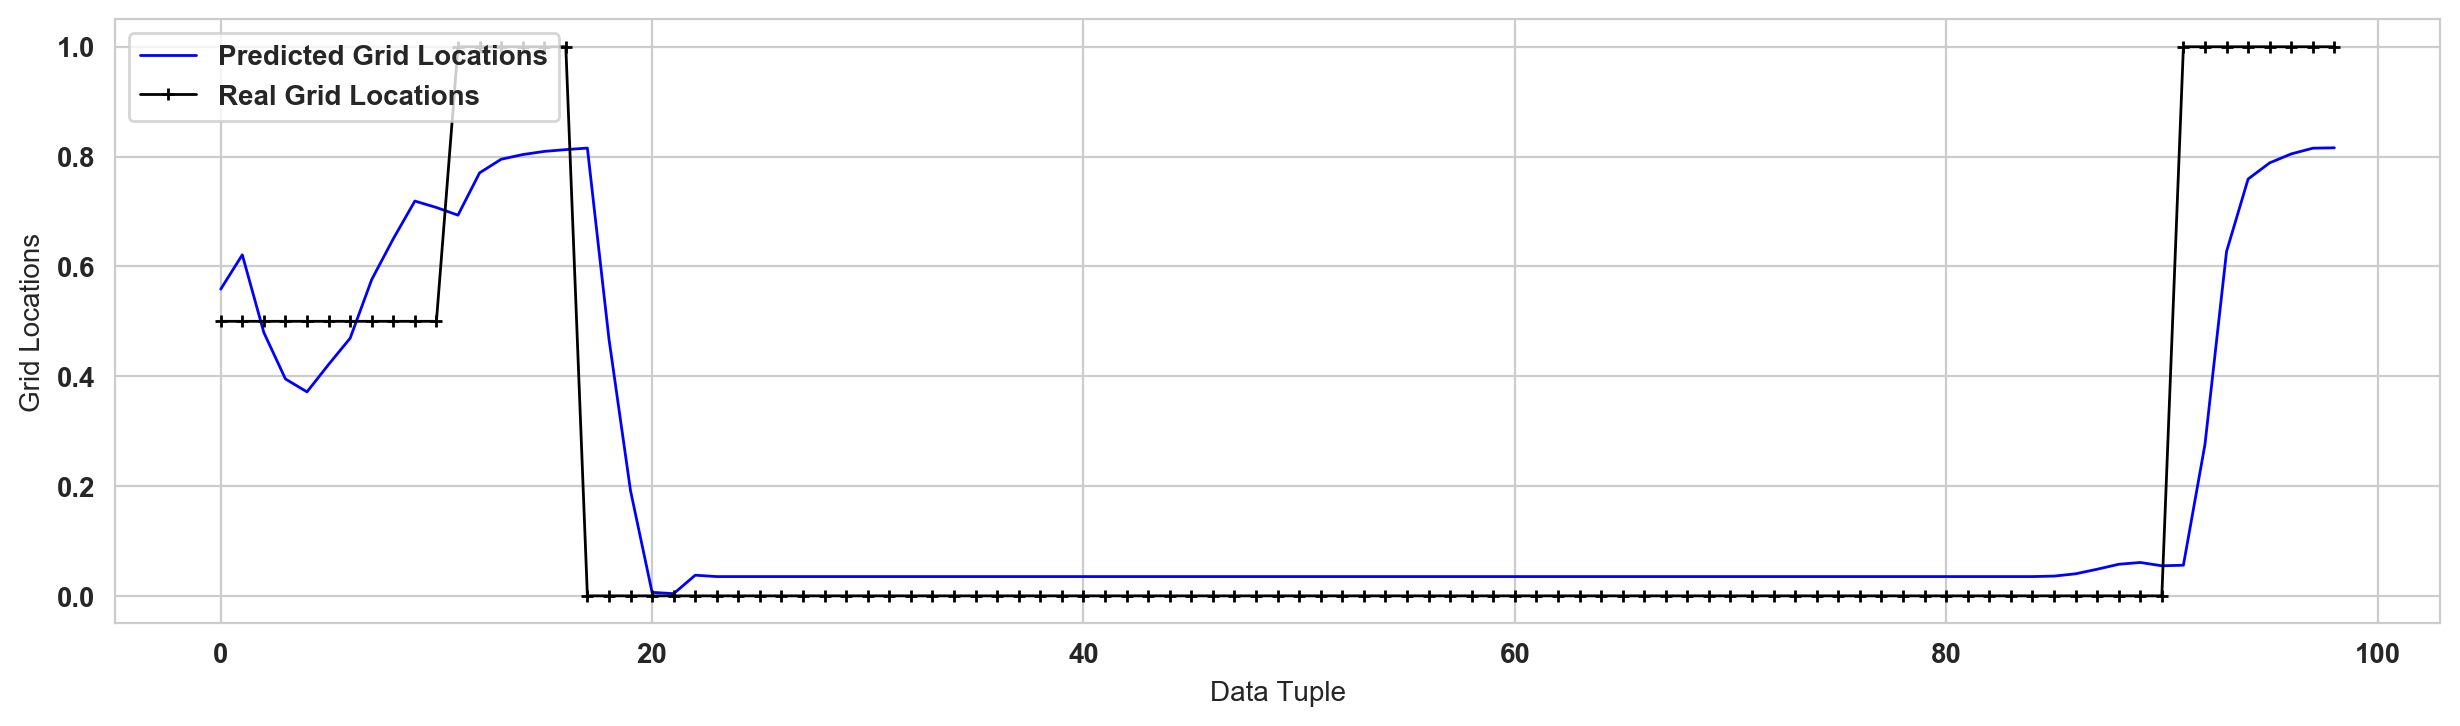

In [81]:
plt.figure(figsize=(15, 4), dpi=100)
plt.plot(pred[:99],
         linewidth=1, 
         color='blue', 
         label='Predicted Grid Locations')
plt.plot(y_test[:99],
         linewidth=1, 
         color='black',
         marker='+',
         markersize=4,
         label='Real Grid Locations')
# plt.savefig('denormalized_predictions')
plt.xlabel('Data Tuple')
plt.ylabel('Grid Locations')

plt.legend(loc='upper left')
# plt.savefig('grid_accuracy.png')
plt.show()

In [82]:
len(pred)

99

In [83]:
pred[0:99].flatten()

array([0.5586075 , 0.6210866 , 0.47946736, 0.3950093 , 0.3714695 ,
       0.42131495, 0.46921414, 0.5760046 , 0.6502841 , 0.7190201 ,
       0.70728827, 0.6933054 , 0.77030116, 0.7951216 , 0.8036624 ,
       0.8094387 , 0.8127234 , 0.8155166 , 0.46800902, 0.19164269,
       0.006412  , 0.00404493, 0.03763438, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512196,
       0.03512196, 0.03512196, 0.03512196, 0.03512196, 0.03512

In [84]:
flat_pred = pred.flatten()

In [85]:
hurr_real = []
hurr_pred = []
temp_real = []
temp_pred = []
for x in range(len(y_test)):
#     print(y_test[x])
    if not y_test[x] == 0:
        temp_real += [y_test[x]]
#         print(len(temp_real))
        temp_pred += [flat_pred[x]]
#         print(len(temp_pred))
    else:
        hurr_real += [temp_real]
#             print(hurr_real)
        hurr_pred += [temp_pred]
#             print(hurr_pred)
#             print(' ')
#             plt.plot(hurr_real, hurr_pred)
        temp_real = []
        temp_pred = []

In [86]:
print(len(hurr_real))
print(len(hurr_pred))

lol_real = [x for x in hurr_real if bool(x)]
print(len(lol_real))
lol_pred = [x for x in hurr_pred if bool(x)]
print(len(lol_pred))

74
74
1
1


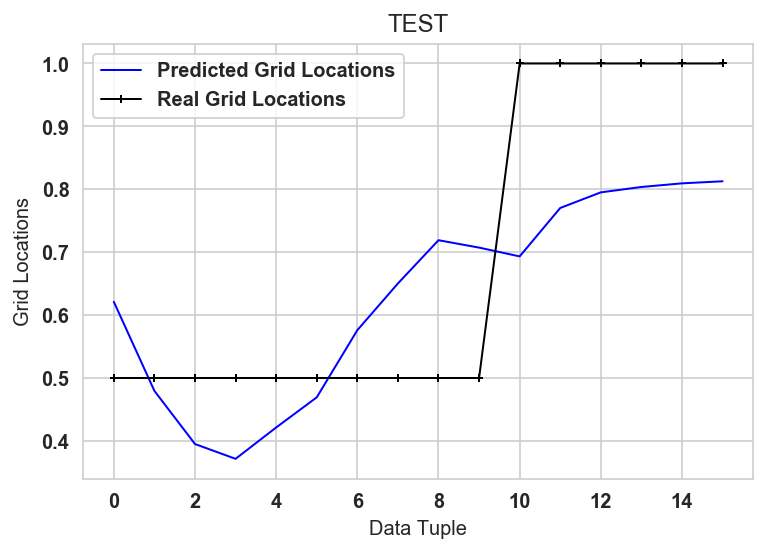

In [87]:
for x in range(len(lol_real)):
    if len(lol_real[x]) > 12:
        plt.plot(lol_pred[x][1:], linewidth=1, color='blue', label='Predicted Grid Locations')
#         plt.plot(lol_pred_temp[x][1:14], label='Training Grid Locations')
#         plt.plot(list(range(12, len(lol_pred_temp[x]))), lol_pred_temp[x][12:], label='Predicted Grid Locations')
        plt.plot(lol_real[x][1:], linewidth=1, color='black', marker='+', markersize=4, label='Real Grid Locations')
        plt.title('TEST')
        plt.xlabel('Data Tuple')
        plt.ylabel('Grid Locations')
        plt.legend()
        plt.show()

In [88]:
from sklearn.preprocessing import MinMaxScaler

def grid2coord(grid):
    y = np.floor(grid/long_interval) #y_coord
    x = np.floor(grid-y*long_interval) #x_coord
    #x and y represent the bottom left corner of the grid
    return (x+0.5+long_min, y+0.5+lat_min)

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector

def load_hurricane(stock, seq_len):#load a single Cyclone
    amount_of_features = len(stock.columns)
    data = stock.values
    sequence_length = seq_len + 1 # Because index starts at 0
    result = []

    for index in range(len(data) - sequence_length):
        seq = data[index: index + sequence_length]
        result.append(seq)
                
    result = np.array(result)
    result = result[:,:-1]
    return np.reshape(result, (result.shape[0], result.shape[1], amount_of_features))

def prep_hurricane(hurr, name):
    data_pad = [hurr[ hurr.loc[:, 'name'] == name].loc[:, ['winSpeed', 'pressure', 'Distance', 'Direction', 'gridID']]]
    hurr.drop(['name'], axis = 1, inplace = True)
    hurr = hurr[hurr['Distance'] > 0]

    hurr['Distance'] = np.log(hurr['Distance'])

    hurr = hurr[hurr['Direction'] > 0]
    hurr['Direction'] = np.log(hurr['Direction'])
    
#     print (hurr)
#     print ()
#     print (data_pad)
    padded_data = keras.preprocessing.sequence.pad_sequences(data_pad, maxlen=83, dtype='int32', padding='post', truncating='pre', value=0.0)
    
#     print(padded_data)
    return pd.DataFrame(scalers[name].fit_transform(padded_data[0]), columns=['windSpeed', 'pressure', 'Distance', 'Direction', 'gridID'])
    
def test():
    data = pd.read_csv('check.csv', index_col=0)
    name = 'CALIDERA' # Hurricane Key

    window = 5
    hurricane = prep_hurricane(data[data['name'] == name], name) # This is good

    hurr_data = load_hurricane(hurricane[::-1], window)
    return hurr_data.shape
 #print(test())

34


C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


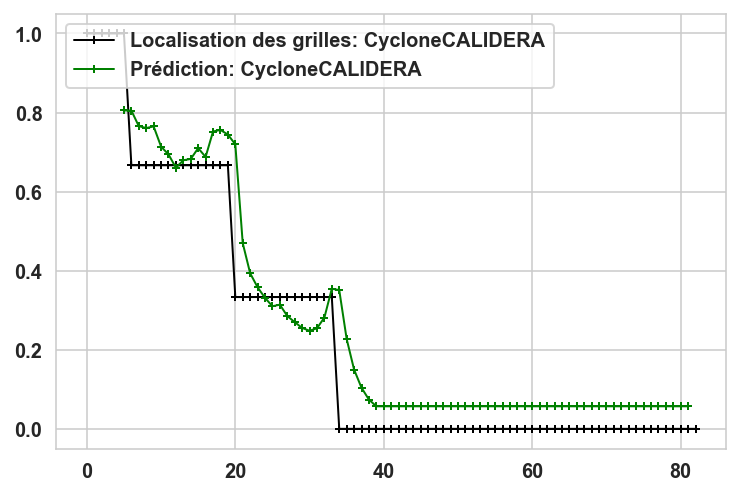

In [91]:
from scipy.signal import savgol_filter
from sklearn.metrics import mean_absolute_error
import math

data = pd.read_csv('check.csv', index_col=0)

food = ['CALIDERA']

names = [v for i, v in enumerate(data['name'].unique()) if any(s in v for s in food)]

for x in names:

    name = x # Hurricane Key

    window = 5
    print (len(data[data['name'] == name]))
    if len(data[data['name'] == name]) < 10:
        continue
    try:
        hurricane = prep_hurricane(data[data['name'] == name], name) # This is good

        hurr_data = load_hurricane(hurricane, window)
    except IndexError:
        continue
    hurricane_temp = hurricane['gridID']
   

    pred = model.predict(hurr_data)
    hurricane_temp = hurricane_temp
    
    y = hurricane_temp
    plt.plot(list(np.arange(0,len(y),1)), y,
             linewidth=1, 
             color='black',
             marker='+',
             markersize=4,
             label='Localisation des grilles: Cyclone' + name)
    plt.plot(list(np.arange(5,len(pred) + 5,1)), pred,
         linewidth=1, 
         color='green',
         marker='+',
         markersize=4,
         label='Prédiction: Cyclone' + name)
    plt.legend(loc='upper left')

    #plt.savefig('grid_accuracy_one_hurr.png')
    plt.show()

83


C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


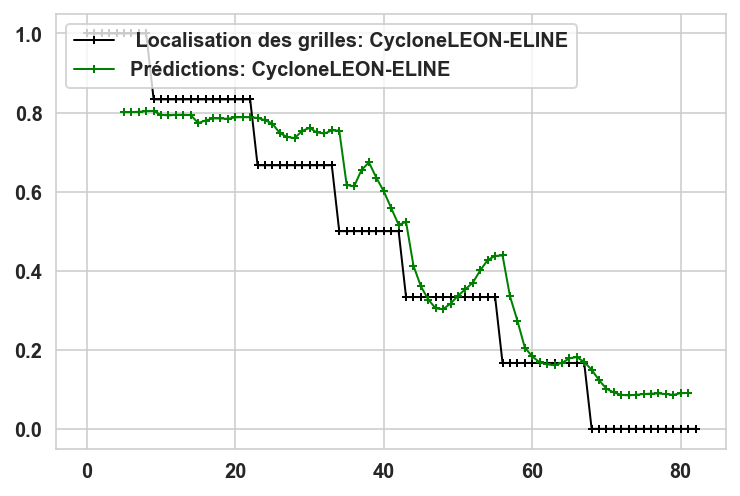

In [92]:

food = ['LEON-ELINE']

names = [v for i, v in enumerate(data['name'].unique()) if any(s in v for s in food)]

for x in names:

    name = x # Hurricane Key

    window = 5
    print (len(data[data['name'] == name]))
    if len(data[data['name'] == name]) < 10:
        continue
    try:
        hurricane = prep_hurricane(data[data['name'] == name], name) # This is good

        hurr_data = load_hurricane(hurricane, window)
    except IndexError:
        continue
    hurricane_temp = hurricane['gridID']
   

    pred = model.predict(hurr_data)
    hurricane_temp = hurricane_temp
    
    y = hurricane_temp
    plt.plot(list(np.arange(0,len(y),1)), y,
             linewidth=1, 
             color='black',
             marker='+',
             markersize=4,
             label=' Localisation des grilles: Cyclone' + name)
    plt.plot(list(np.arange(5,len(pred) + 5,1)), pred,
         linewidth=1, 
         color='green',
         marker='+',
         markersize=4,
         label='Prédictions: Cyclone' + name)
    plt.legend(loc='upper left')

    #plt.savefig('grid_accuracy_one_hurr.png')
    plt.show()

75


C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


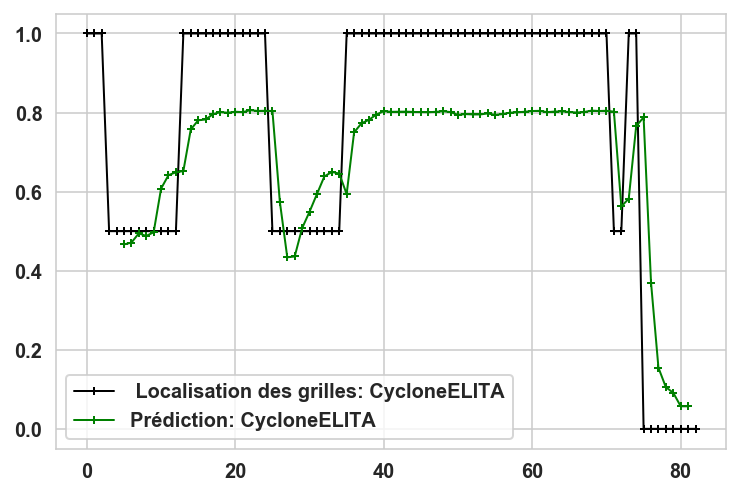

In [93]:

food = ['ELITA']

names = [v for i, v in enumerate(data['name'].unique()) if any(s in v for s in food)]

for x in names:

    name = x # Hurricane Key

    window = 5
    print (len(data[data['name'] == name]))
    if len(data[data['name'] == name]) < 10:
        continue
    try:
        hurricane = prep_hurricane(data[data['name'] == name], name) # This is good

        hurr_data = load_hurricane(hurricane, window)
    except IndexError:
        continue
    hurricane_temp = hurricane['gridID']
   

    pred = model.predict(hurr_data)
    hurricane_temp = hurricane_temp
    
    y = hurricane_temp
    plt.plot(list(np.arange(0,len(y),1)), y,
             linewidth=1, 
             color='black',
             marker='+',
             markersize=4,
             label=' Localisation des grilles: Cyclone' + name)
    plt.plot(list(np.arange(5,len(pred) + 5,1)), pred,
         linewidth=1, 
         color='green',
         marker='+',
         markersize=4,
         label='Prédiction: Cyclone' + name)
    plt.legend()

    #plt.savefig('grid_accuracy_one_hurr.png')
    plt.show()

60


C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


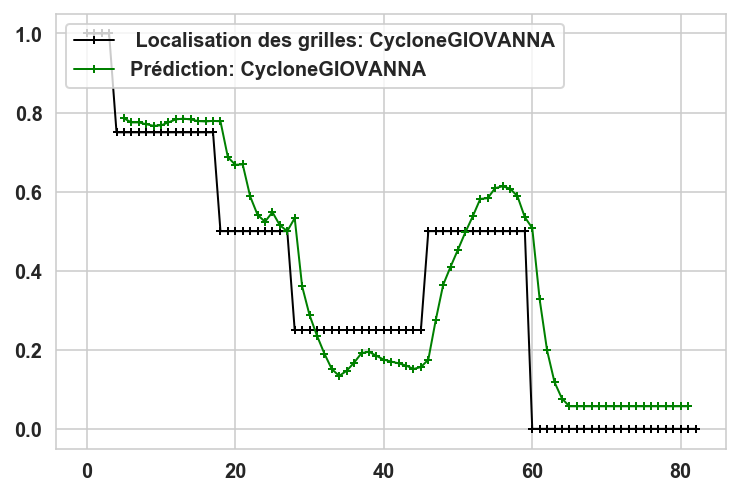

In [94]:

food = ['GIOVANNA']

names = [v for i, v in enumerate(data['name'].unique()) if any(s in v for s in food)]

for x in names:

    name = x # Hurricane Key

    window = 5
    print (len(data[data['name'] == name]))
    if len(data[data['name'] == name]) < 10:
        continue
    try:
        hurricane = prep_hurricane(data[data['name'] == name], name) # This is good

        hurr_data = load_hurricane(hurricane, window)
    except IndexError:
        continue
    hurricane_temp = hurricane['gridID']
   

    pred = model.predict(hurr_data)
    hurricane_temp = hurricane_temp
    
    y = hurricane_temp
    plt.plot(list(np.arange(0,len(y),1)), y,
             linewidth=1, 
             color='black',
             marker='+',
             markersize=4,
             label=' Localisation des grilles: Cyclone' + name)
    plt.plot(list(np.arange(5,len(pred) + 5,1)), pred,
         linewidth=1, 
         color='green',
         marker='+',
         markersize=4,
         label='Prédiction: Cyclone' + name)
    plt.legend(loc='upper left')

    #plt.savefig('grid_accuracy_one_hurr.png')
    plt.show()

16


C:\Anaconda37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


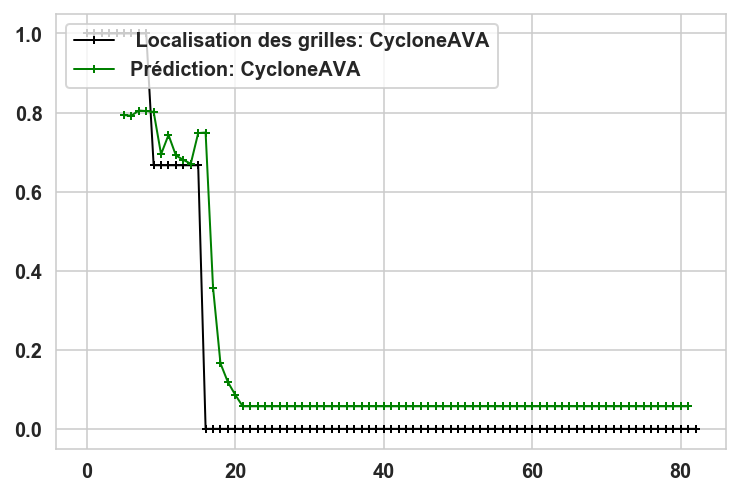

In [95]:

food = ['AVA']

names = [v for i, v in enumerate(data['name'].unique()) if any(s in v for s in food)]

for x in names:

    name = x # Hurricane Key

    window = 5
    print (len(data[data['name'] == name]))
    if len(data[data['name'] == name]) < 10:
        continue
    try:
        hurricane = prep_hurricane(data[data['name'] == name], name) # This is good

        hurr_data = load_hurricane(hurricane, window)
    except IndexError:
        continue
    hurricane_temp = hurricane['gridID']
   

    pred = model.predict(hurr_data)
    hurricane_temp = hurricane_temp
    
    y = hurricane_temp
    plt.plot(list(np.arange(0,len(y),1)), y,
             linewidth=1, 
             color='black',
             marker='+',
             markersize=4,
             label=' Localisation des grilles: Cyclone' + name)
    plt.plot(list(np.arange(5,len(pred) + 5,1)), pred,
         linewidth=1, 
         color='green',
         marker='+',
         markersize=4,
         label='Prédiction: Cyclone' + name)
    plt.legend(loc='upper left')

    #plt.savefig('grid_accuracy_one_hurr.png')
    plt.show()